# 서울시 생활정보 기반 대중교통 수요 분석 프로젝트

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [131]:
# 기본 경로
path = 'C:/Users/User/project/2024.09.24_미니프로젝트1차_실습파일/'

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [ ]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [23]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [133]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [135]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [137]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,한식 음식점,기타주점업,커피전문점
0,종로구,7894,1413,3613
1,중구,8535,982,3542
2,용산구,4171,1332,2076
3,성동구,4330,621,1859
4,광진구,4539,1577,1887


In [139]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계인구
0,중구,63365,68392,131757
1,용산구,105480,113343,218823
2,성동구,136779,146555,283334
3,광진구,166541,183141,349682
4,동대문구,173830,185713,359543


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [141]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [36]:
# 확인
df

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,음식점업,학원업,의류 도매업,미용업,기타주점업,남자,여자,합계인구
13,서대문구,456,109,6635861,6554692,114.108419,112.712659,59.917230,41.517415,26552021,18398235.05,3782,1268,68,1185,1127,148914,170489,319403
14,서초구,602,105,7776846,7575195,125.081964,121.838630,63.284077,64.608088,32910441,33598983.96,9050,3812,1563,1832,1255,196114,216033,412147
12,마포구,561,102,6118596,5943912,107.157674,104.098355,60.942815,52.706976,30495358,26374202.00,7633,1855,1209,2042,2559,173001,200763,373764
22,중구,172,102,4384564,4238810,132.192595,127.798179,56.495425,43.895374,28421662,22082840.96,8535,175,24248,816,982,63365,68392,131757
19,영등포구,466,101,6555386,6611792,125.327611,126.405995,60.477100,55.985863,31067449,28760273.86,8627,1082,1220,1261,1489,195211,202610,397821
16,성북구,596,100,6610774,6642472,116.676503,117.235955,59.975355,43.425861,28227521,20438468.24,4156,1755,454,1245,1030,207616,228447,436063
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,16494,9020,8320,6255,2528,268993,293762,562755
11,동작구,435,94,5483153,5292264,120.561851,116.364644,58.500266,40.631093,25843604,17949557.24,3499,1463,199,1105,955,187138,201865,389003
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,5317,1230,190,1604,1672,248571,248566,497137
6,구로구,478,81,5525646,5324566,125.119353,120.566221,63.983186,43.321989,26223125,17755257.26,4711,1111,923,1134,1165,203142,209735,412877


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.
- 서울시유동인구등의인구정보와버스승하차인원, 운행노선분석으로버스노선추가가필요한서울시내자치구를선정한다

### 1) 가설 1:
이동인구(평균) 많고 노선 수이 부족한 곳을 늘릴 필요성이 보인다

### 2) 가설 2:
승차, 하차 총 승객수가 적거나 많은 곳에 노선 수를 조절할 필요가 있어 보인다.

### 3) 가설 3
 노인들이 많은 곳에 버스 노선을 늘릴 필요가 있다.


### 4) 가설 4
 (한식일반, 한식육류, 커피, 주점) 이 많은 지역에 불구하고 노선수가 부족하다면 늘릴 필요가 있다 

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  : 업종총계 생성 (한식 일반, 한식 육류, 커피, 주점)
- 기초통계량 : 노선수가 가장 많은 지역은 109개, 가장 적은 지역은 24개
- 분포 : scatter plot
- 위 정보로부터 파악한 내용(비즈니스) 정리
- 
- 추가 분석해볼 사항 도출 등

In [127]:
df[['한식일반', '한식육류', '커피', '주점']]

Index(['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구', '음식점업', '학원업', '의류 도매업',
       '미용업', '기타주점업', '남자', '여자', '합계인구', '업종총계', '승하차총수'],
      dtype='object')

# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

### 1) 가설 1
#### 이동인구(평균) 많고 노선 수이 부족한 곳을 늘릴 필요성이 보인다

### 2) 가설 2
#### 승차, 하차 총 승객수가 적거나 많은 곳에 노선 수를 조절할 필요가 있어 보인다.

### 3) 가설 3
#### 노인들이 많은 곳에 버스 노선을 늘릴 필요가 있다.

### 4) 가설 4
#### 업종총계(한식일반, 한식육류, 커피, 주점) 이 많은 지역에 불구하고 노선수가 부족하다면 늘릴 필요가 있다

# 6. 관계 정리

### 1) 강한 관계의 열
- 가설4번: 총 이동인구, 업종총계 : 0.91 (강한관계)
- 가설2번: 노선수, 승하차 총 승객수 (승차 총 승객수 + 하차 총 승객수) : 0.74 (중간관계)

### 2) 중간 관계의 열
- 가설1번: 이동인구(합) , 정류장수 : 0.43 (중간관계)
- 가설3번: pv의 값을 판단했을 때, 관계가 없다고 본다 : 가설입증 불가능


# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

### 1) 이동인구(평균) 많고 노선 수이 부족한 곳을 늘릴 필요성이 보인다

이동인구 NaN: 0 정류장수 NaN: 0
이동인구(합)의 기초통계량: 
 count    24.000000
mean     49.465419
std      14.587999
min      30.799340
25%      39.985573
50%      44.120144
75%      53.526698
max      89.880083
Name: 이동인구(합), dtype: float64 
 
 정류장수의 기초통계량: 
 count     24.000000
mean     429.416667
std      105.963044
min      172.000000
25%      360.500000
50%      445.500000
75%      494.250000
max      602.000000
Name: 정류장수, dtype: float64 
 
 정류장수의 기초통계량: 
 count     24.000000
mean      74.541667
std       23.057545
min       24.000000
25%       57.000000
50%       73.000000
75%       99.250000
max      109.000000
Name: 노선수, dtype: float64


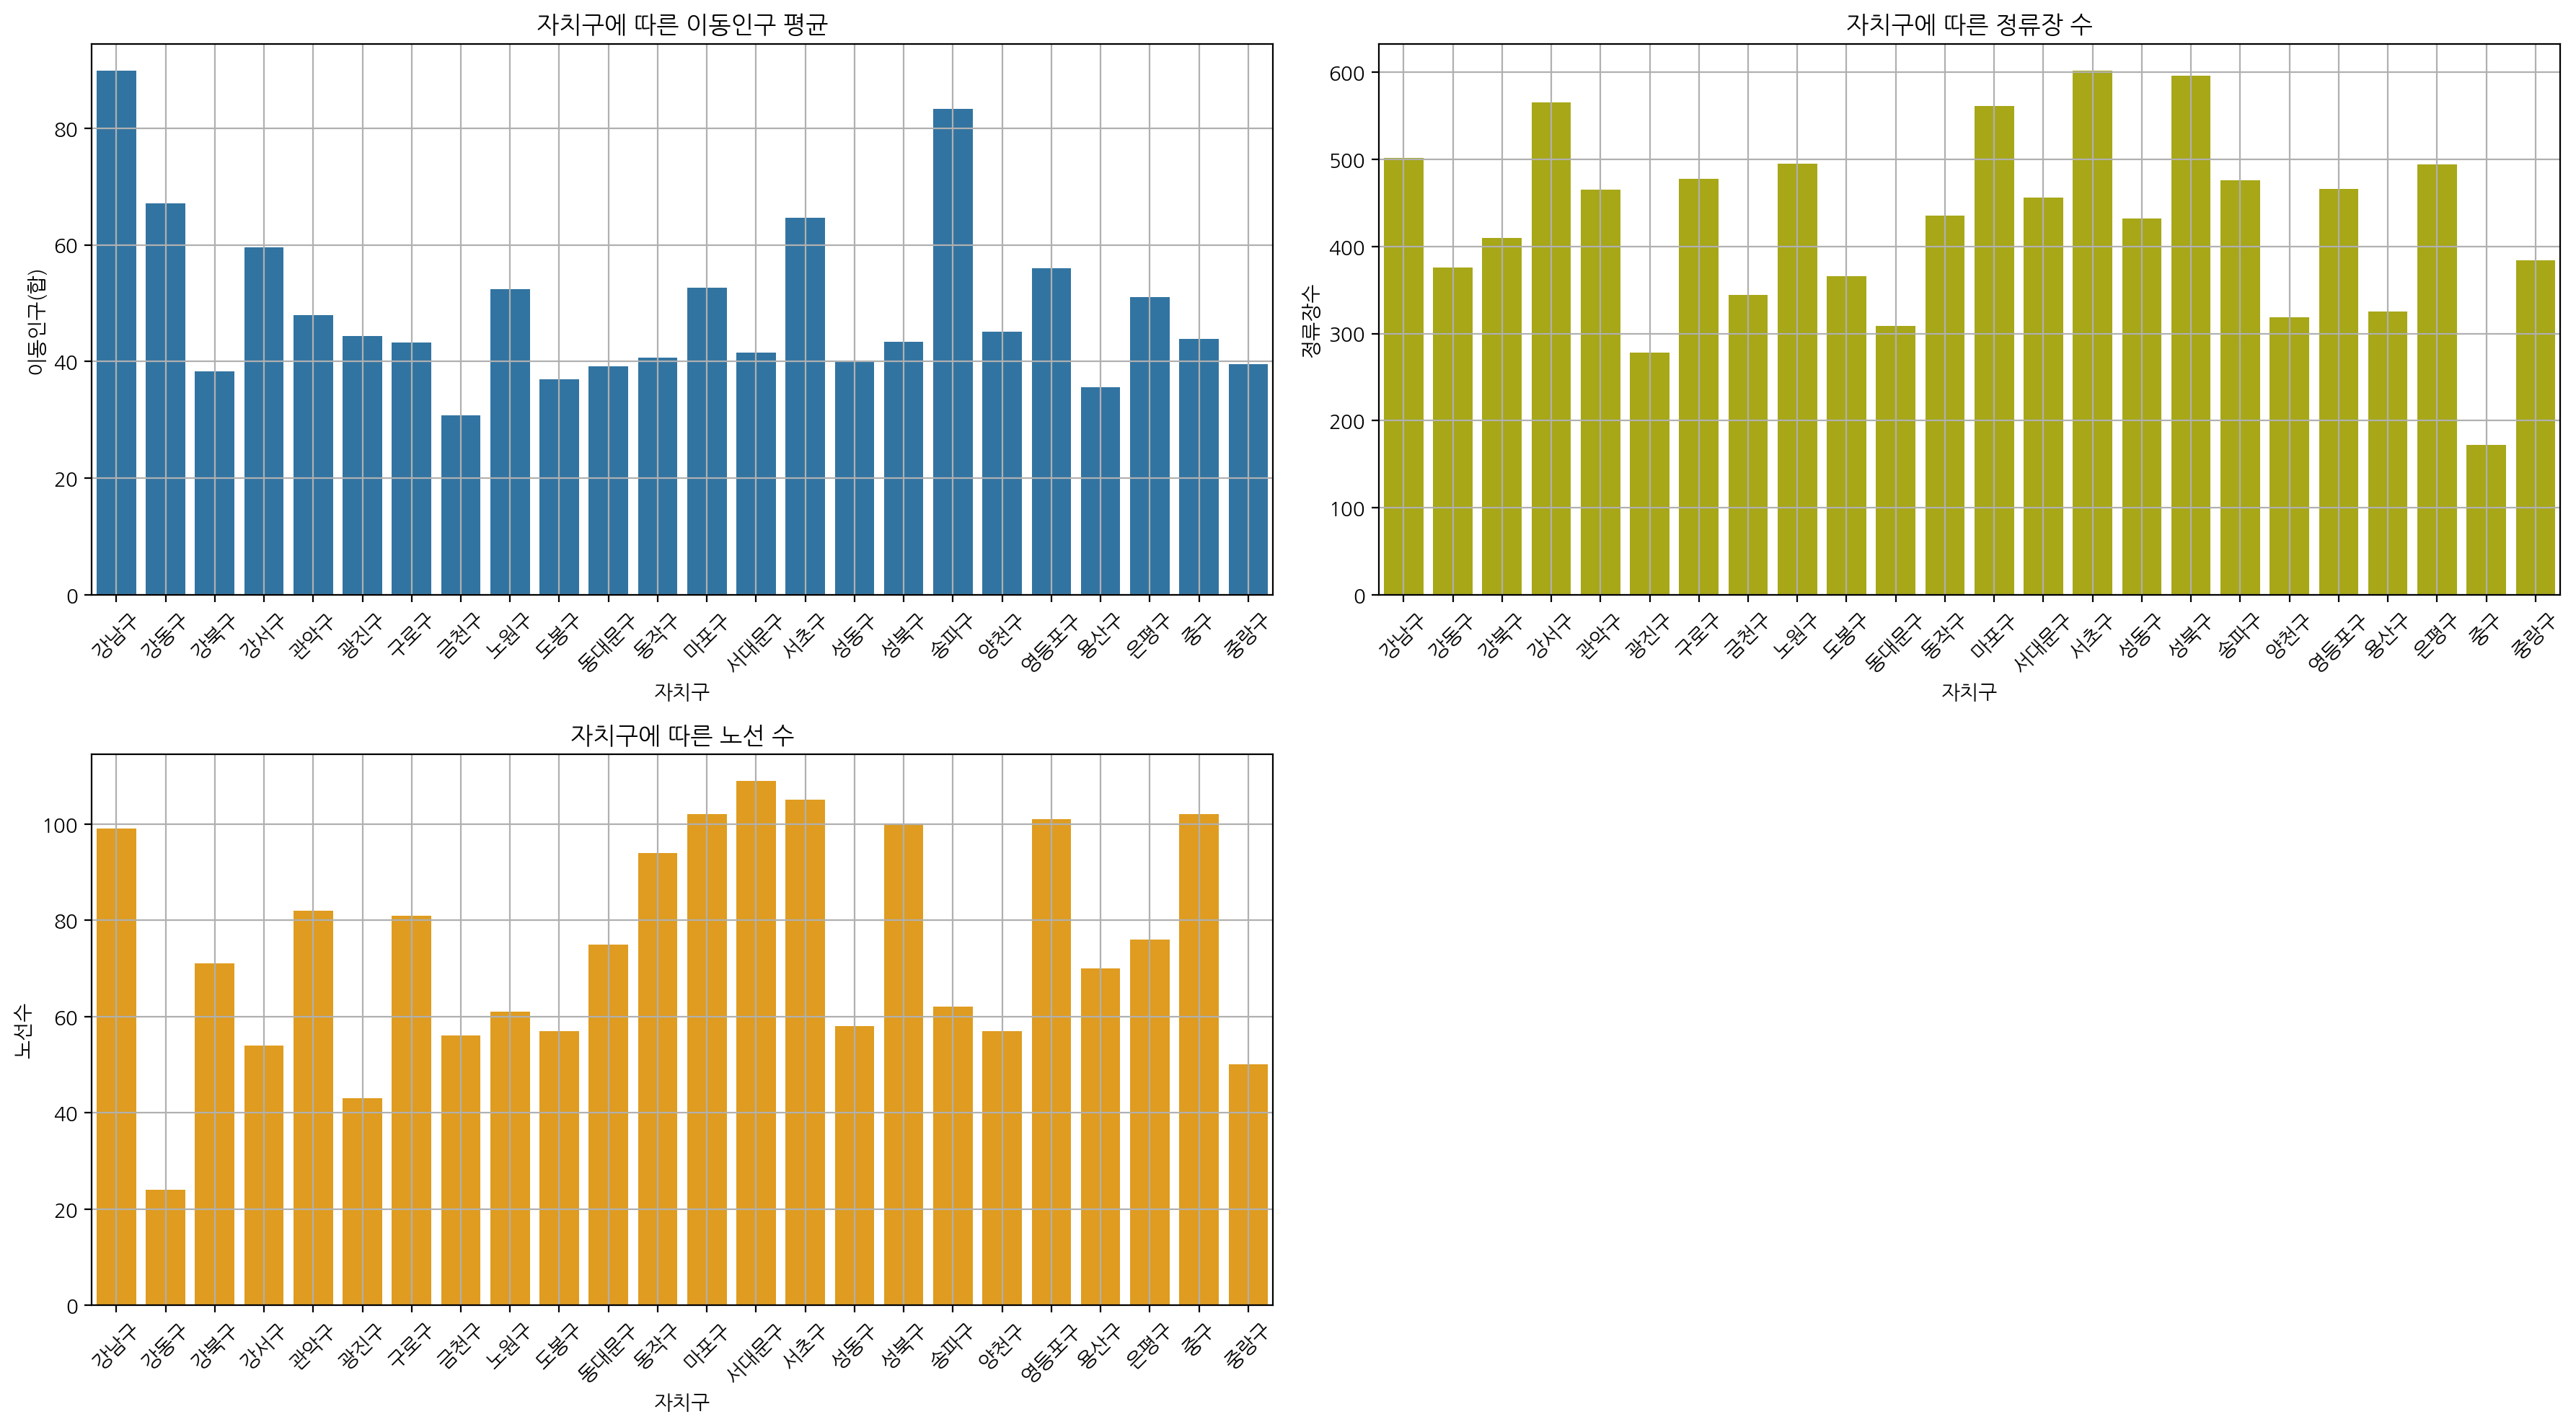

이동인구(합)과 정류장수 상관계수: PearsonRResult(statistic=0.43034450094040566, pvalue=0.03580622742744832) 
 이동인구(합)과 노선수 상관계수: PearsonRResult(statistic=0.0837334769217316, pvalue=0.6972802364754122)


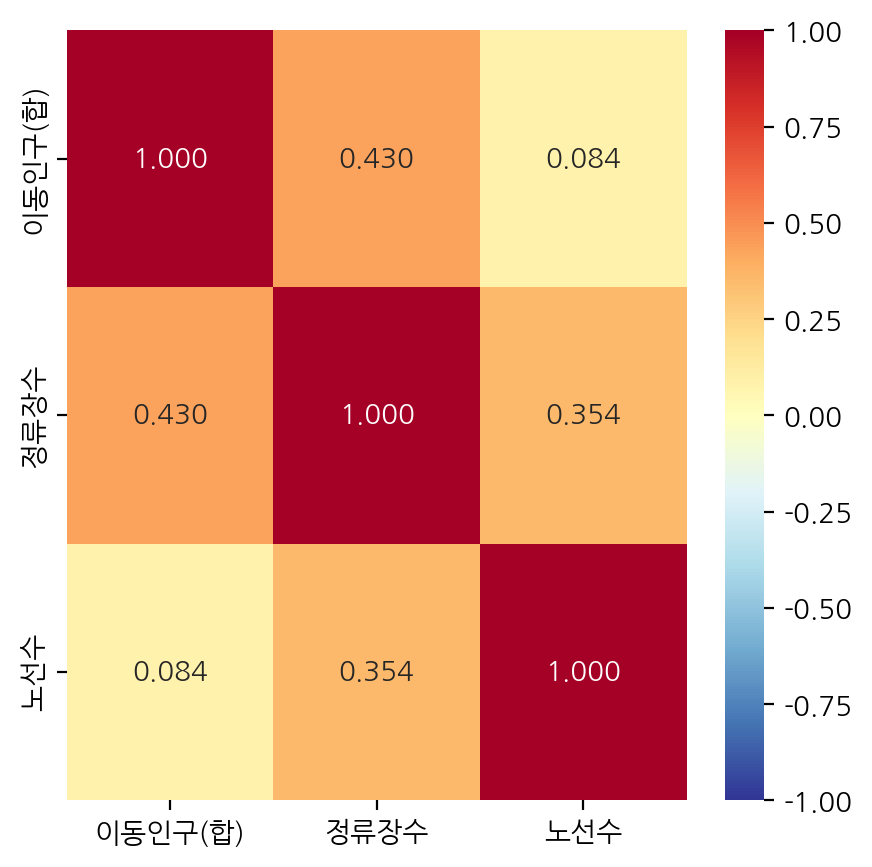

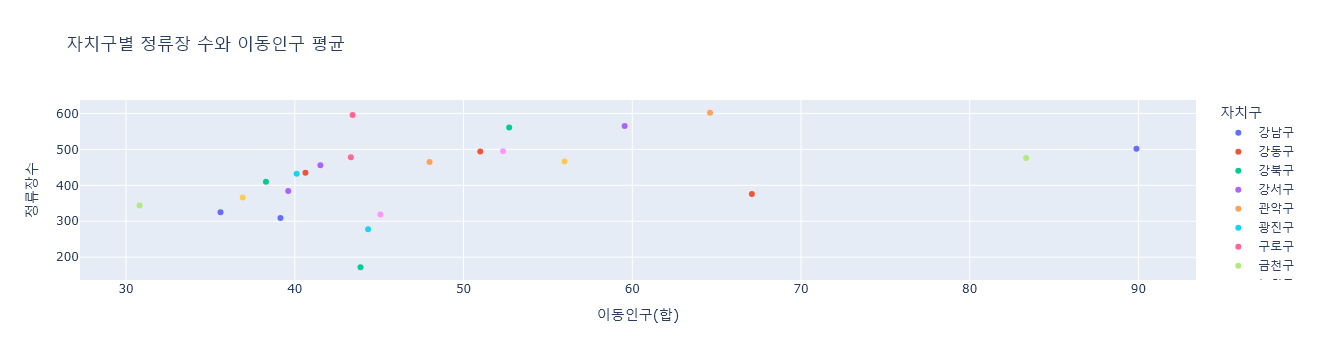

<function matplotlib.pyplot.show(close=None, block=None)>

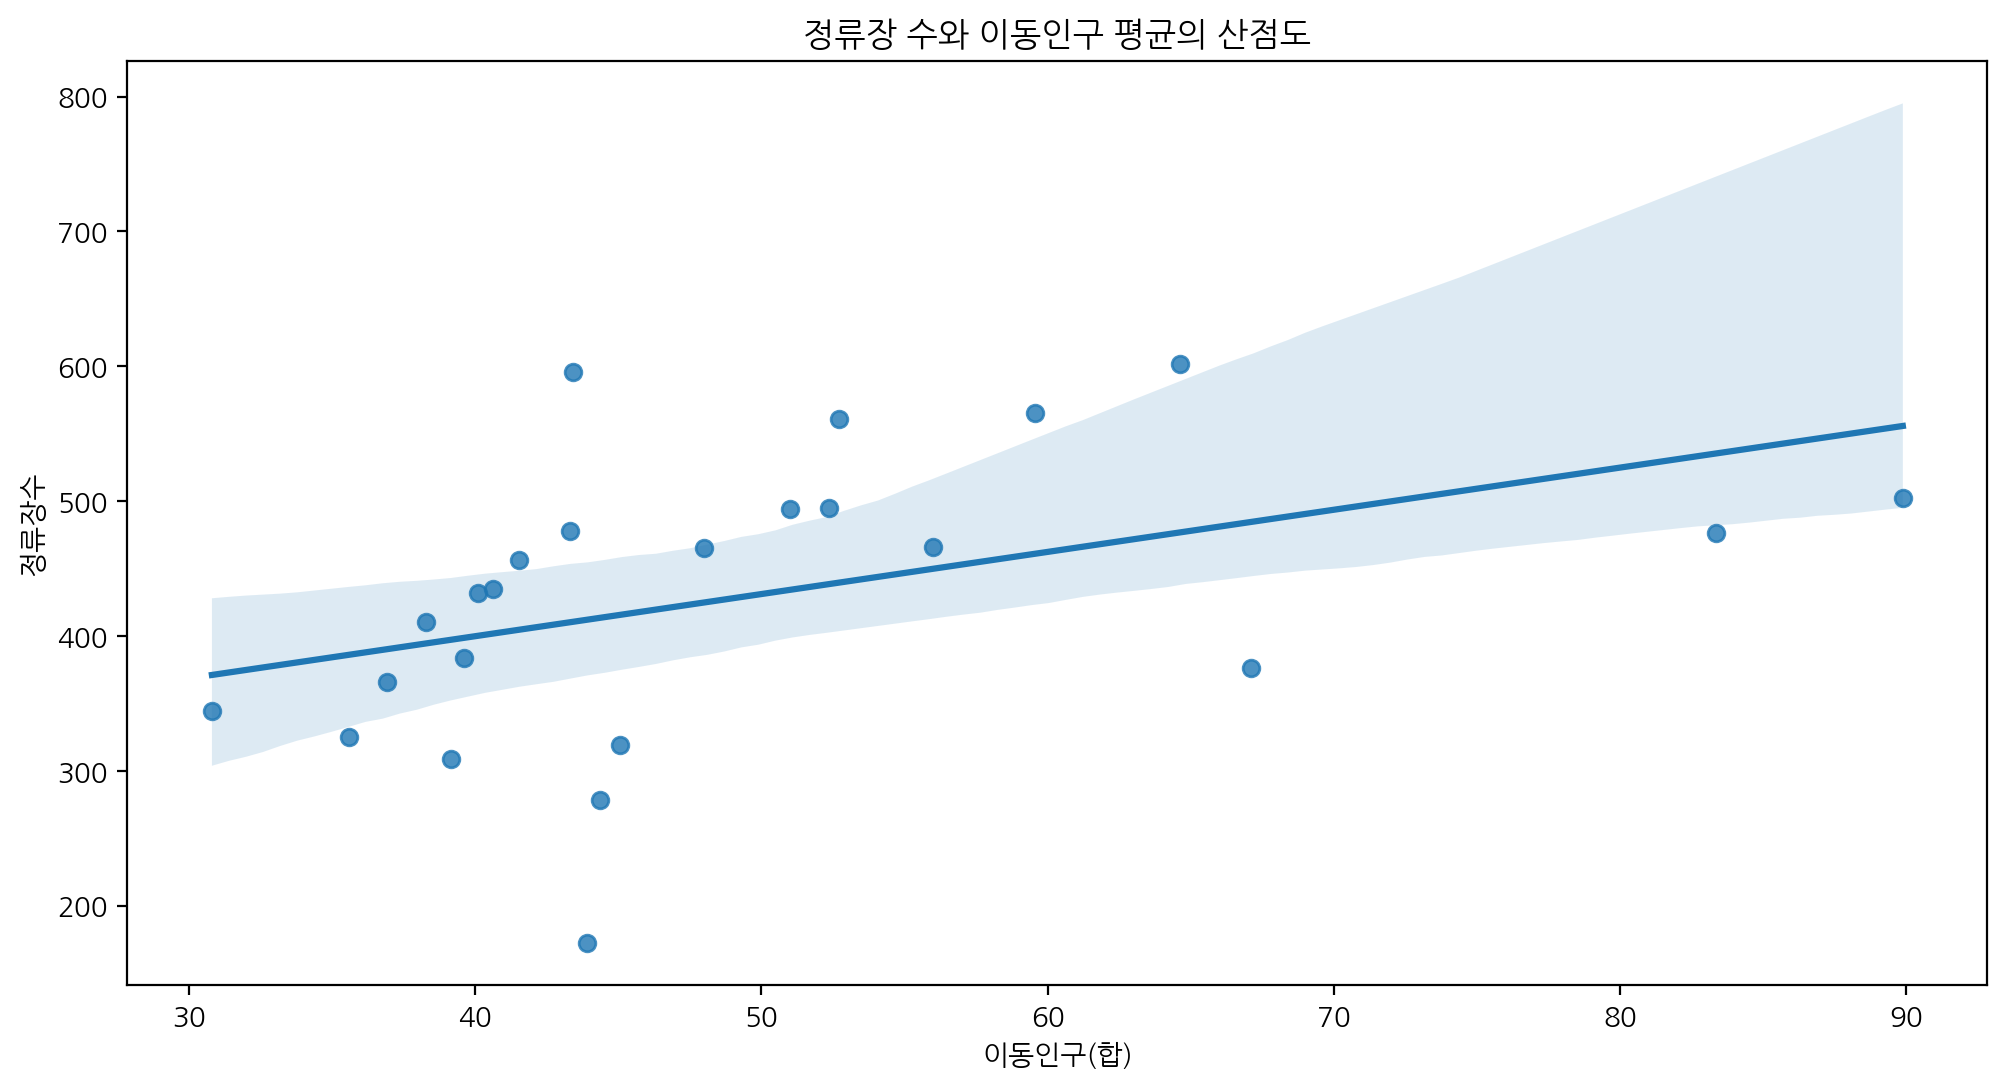

In [374]:
#NaN 존재 여부 확인
df_tmp = df[['이동인구(합)', '정류장수', '노선수']]
print('이동인구 NaN:', df['이동인구(합)'].isna().sum(),'정류장수 NaN:', df['정류장수'].isna().sum())


# 이동인구(합), 노선수의 기초통계량

print('이동인구(합)의 기초통계량:', '\n', df['이동인구(합)'].describe(),'\n','\n', '정류장수의 기초통계량:', '\n', df['정류장수'].describe(), '\n','\n', '정류장수의 기초통계량:', '\n', df['노선수'].describe())

# 의견: 이동인구(합)이 높다면 평균적으로 유동인구가 많은 것이고 그에 비해 노선 수가 적다면 더 많은 노선을 설치하여 교통 편의를 제공할 수 있을거라 생각함

# 이동인구(합), 노선수의 barplot으로 작성
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.barplot(x='자치구', y='이동인구(합)', data = df)
plt.title('자치구에 따른 이동인구 평균')
plt.xticks(rotation = 45)
plt.grid()

plt.subplot(2,2,2)
sns.barplot(x='자치구', y='정류장수', data = df, color = 'y')
plt.title('자치구에 따른 정류장 수')
plt.xticks(rotation = 45)
plt.grid()

plt.subplot(2,2,3)
sns.barplot(x='자치구', y='노선수', data = df, color = 'orange')
plt.title('자치구에 따른 노선 수')
plt.xticks(rotation = 45)
plt.grid()


plt.tight_layout()
plt.show()

# 상관계수와 p-value 측정 > 이동인구(합)과 노선수는 p-value가 0.8이라 가설이 틀렸다 볼수 있음, 
# 이동인구(합)과 노선수는 p-value가 0.5, 상관계수가 0.43으로 중간정도의 상관이 있음

print('이동인구(합)과 정류장수 상관계수:',spst.pearsonr(df['이동인구(합)'], df['정류장수']),'\n', '이동인구(합)과 노선수 상관계수:', spst.pearsonr(df['이동인구(합)'], df['노선수']))


plt.figure(figsize = (5, 5))
sns.heatmap(df_tmp.corr(), 
            annot = True,           
            fmt = '.3f',             
            cmap = 'RdYlBu_r',       
            vmin = -1, vmax = 1)     
plt.show()

import plotly.express as px

# # 정류장 수와 이동인구 평균 상관관계 파악하기
fig = px.scatter(df, 
                 x='이동인구(합)',
                 y='정류장수', 
                 color='자치구', 
                 title='자치구별 정류장 수와 이동인구 평균')

fig.show()


plt.figure(figsize=(12,6))
sns.regplot(x='이동인구(합)', y='정류장수',data=df)
plt.title('정류장 수와 이동인구 평균의 산점도')
plt.show

#결론 : 이동인구의 평균이 높을수록 정류장 수가 많아지나 강동구, 중구 등 다른 데이터에 비해 동떨어진 자치구들은 정류장의 더 많은 설치가 필요해보인다

# 가설1번 결론
#### 노선수의 경우 p-value의 값이 0.05보다 높아 유의미한 관계를 가지지 않는다.
#### 대부분 자치구에서 이동인구의 평균이 증가할 수록 정류장의 수가 많아진다.
#### 그래프를 보면서 위치가 회귀직선에 벗어난 지역(중구, 강동구)에 대해 정류장 수 조절 필요하다.

### 2) 승차, 하차 총 승객수가 적거나 많은 곳에 노선 수를 조절할 필요가 있어 보인다.

            승하차총승객수         노선수
count  2.400000e+01   24.000000
mean   1.069499e+07   74.541667
std    3.044165e+06   23.057545
min    6.319907e+06   24.000000
25%    8.564550e+06   57.000000
50%    1.061902e+07   73.000000
75%    1.255367e+07   99.250000
max    1.775337e+07  109.000000
            승하차총승객수        정류장수
count  2.400000e+01   24.000000
mean   1.069499e+07  429.416667
std    3.044165e+06  105.963044
min    6.319907e+06  172.000000
25%    8.564550e+06  360.500000
50%    1.061902e+07  445.500000
75%    1.255367e+07  494.250000
max    1.775337e+07  602.000000


,승하차총승객수,노선수
승하차총승객수,1.000000,0.735144
노선수,0.735144,1.000000


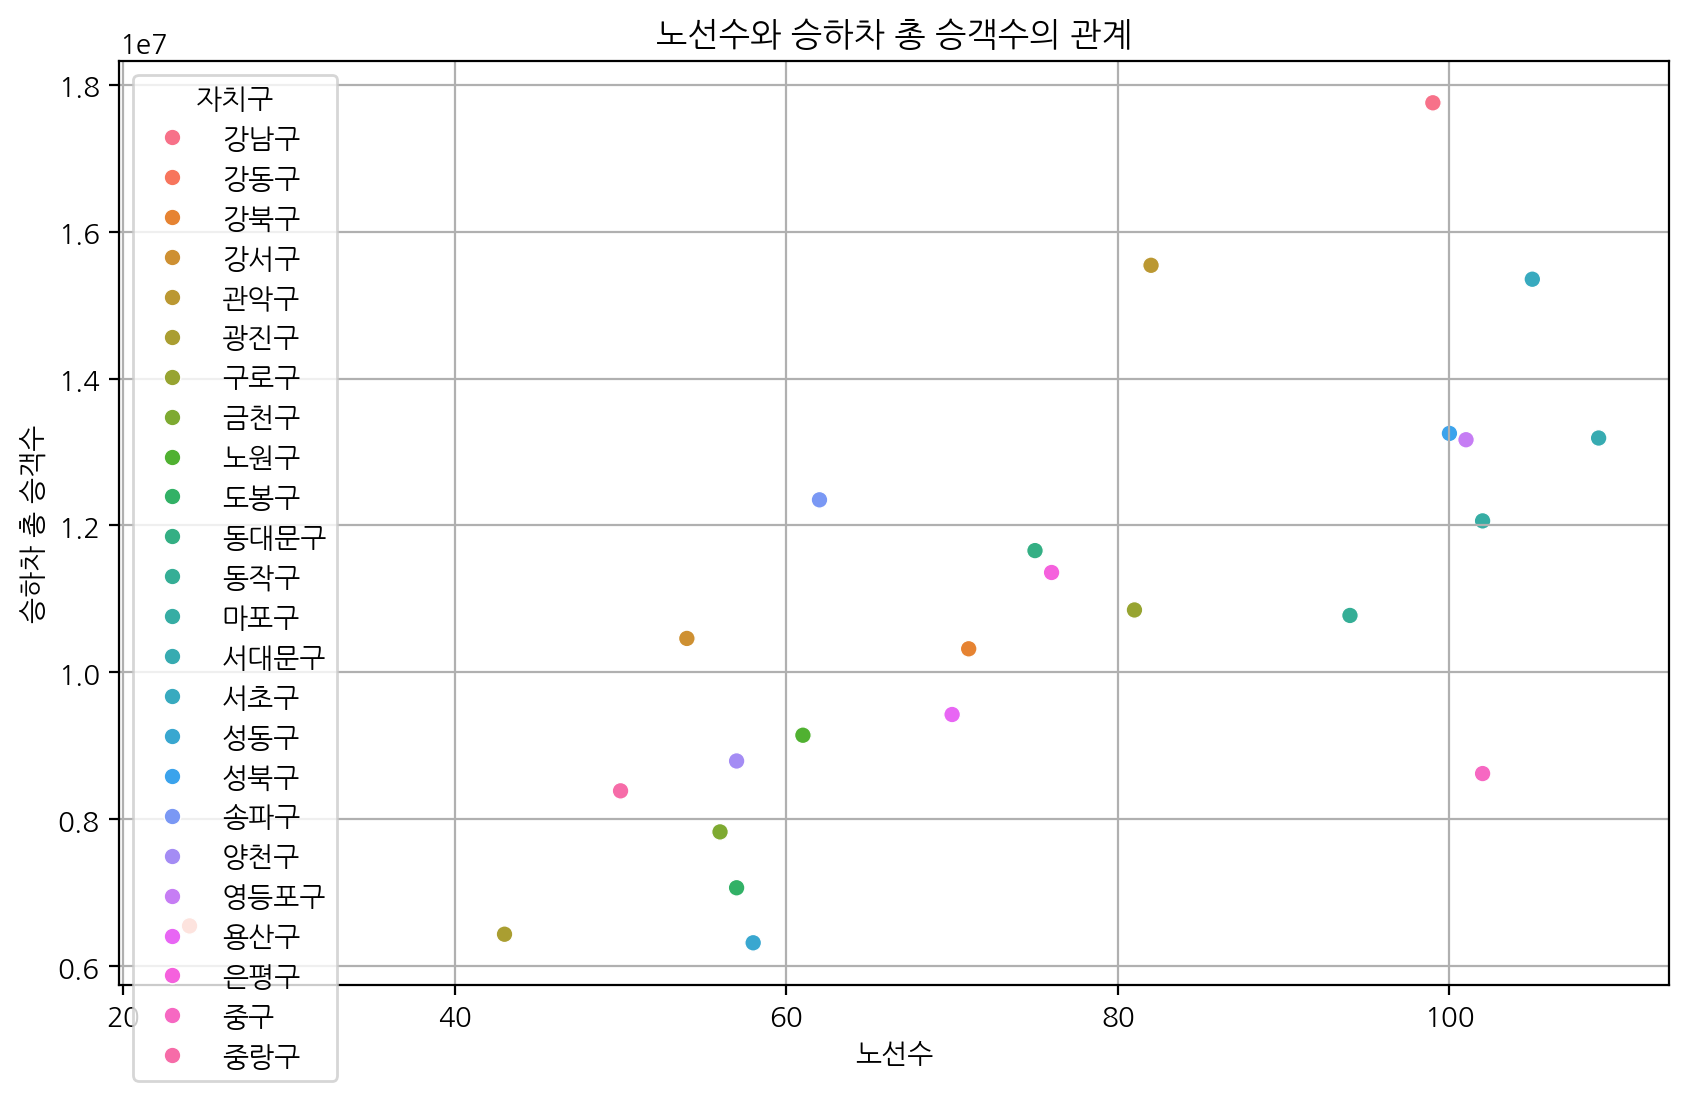

,승하차총승객수,정류장수
승하차총승객수,1.000000,0.599463
정류장수,0.599463,1.000000


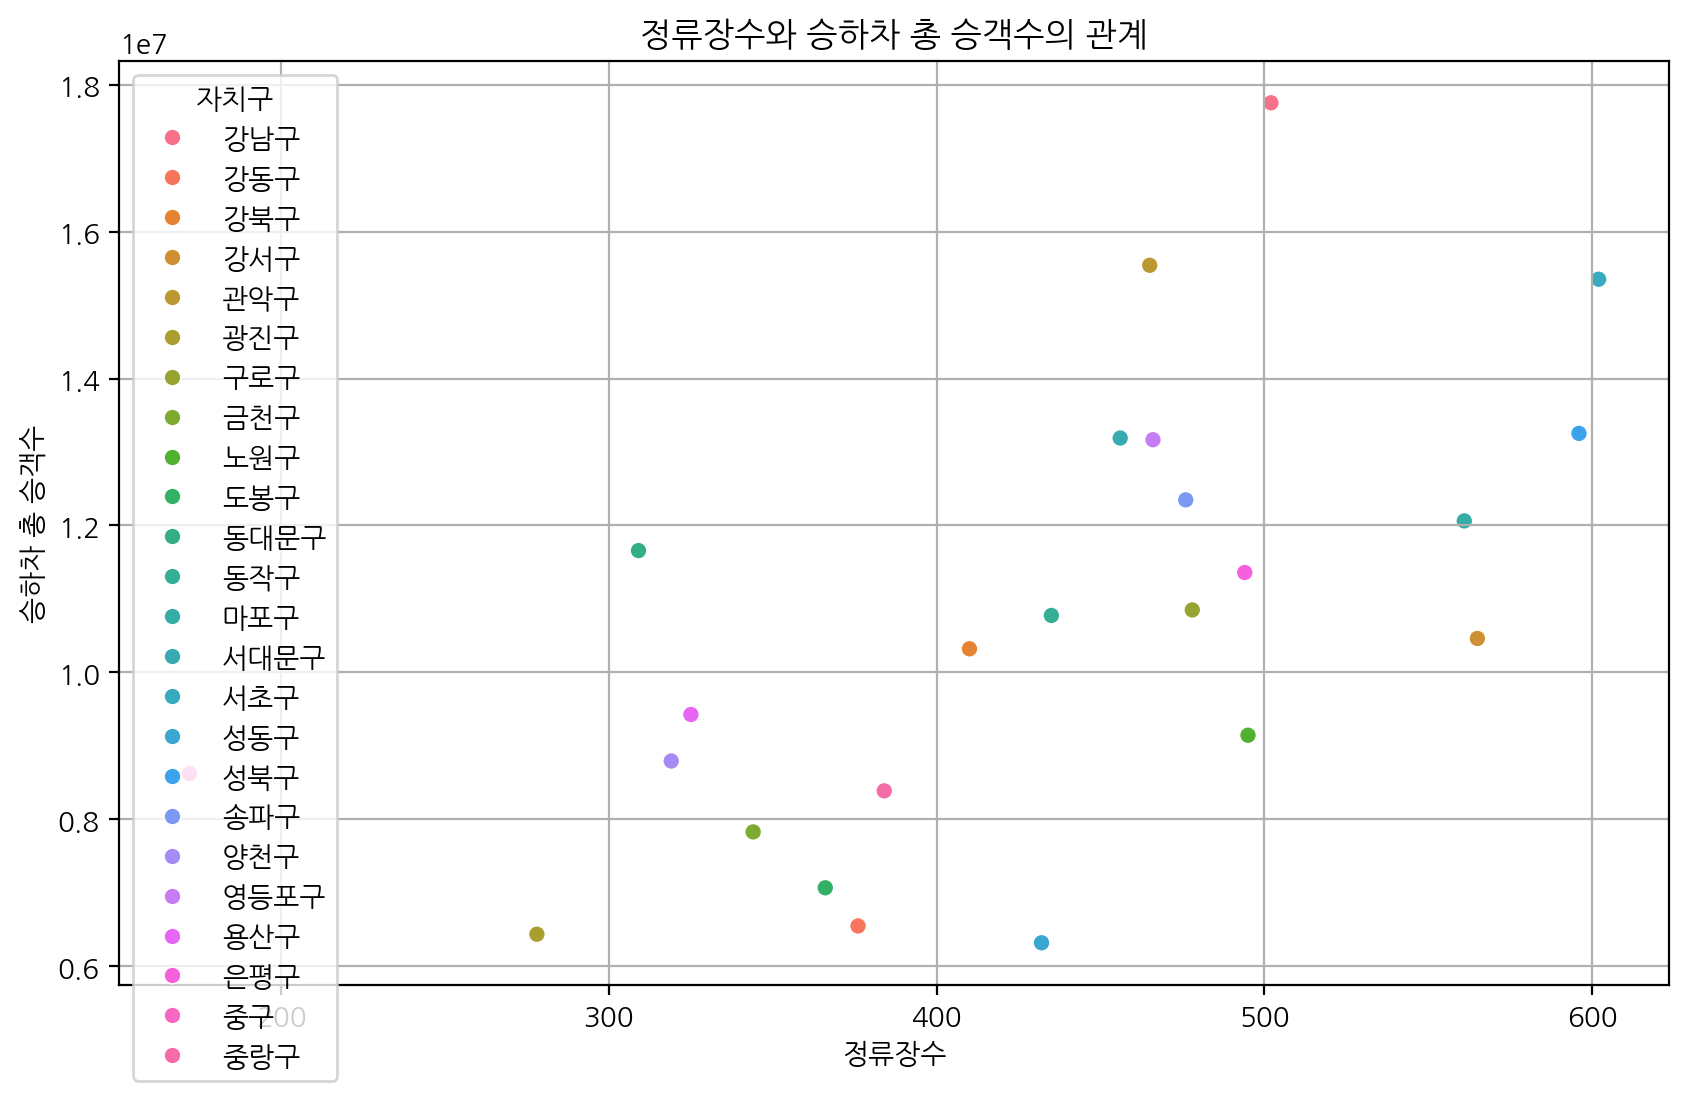

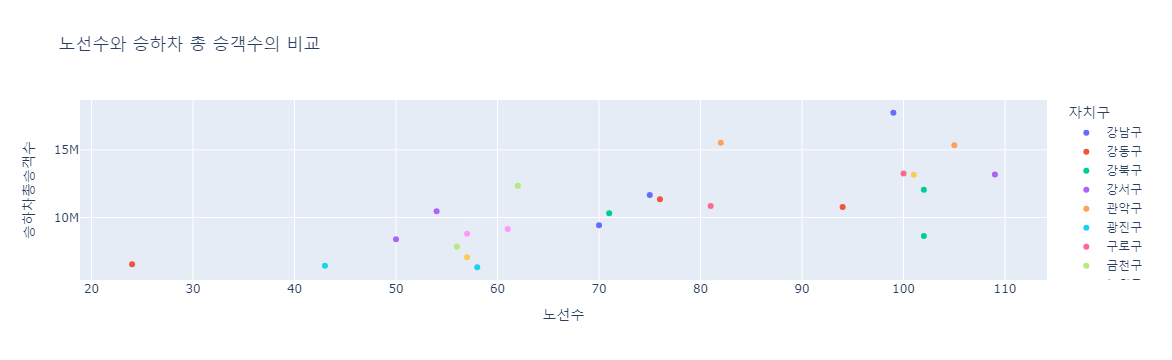

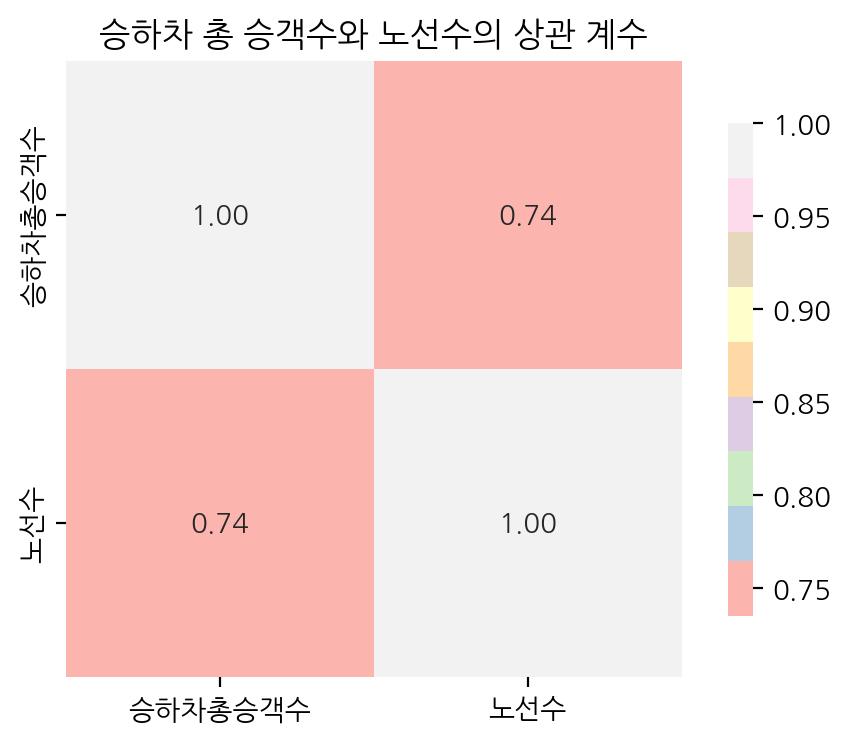

상관계수: 0.7351
p-value: 0.0000
귀무가설 기각. 상관관계가 존재함.
상관관계의 강도: 강한 상관관계


In [400]:
data = {
    '자치구': df['자치구'].tolist(),
    '승하차총승객수': (df['승차총승객수'] + df['하차총승객수']).tolist(),
    '노선수': df['노선수'].tolist()  # 정류장수를 가져오려면 df에서 해당 컬럼을 확인
}

# 데이터프레임 생성
data_df = pd.DataFrame(data)

# 통계량 확인
stats = data_df[['승하차총승객수', '노선수']].describe()
print(stats)


data2 = {
    '자치구': df['자치구'].tolist(),
    '승하차총승객수': (df['승차총승객수'] + df['하차총승객수']).tolist(),
    '정류장수': df['정류장수'].tolist()  # 정류장수를 가져오려면 df에서 해당 컬럼을 확인
}

# 데이터프레임 생성
data_df = pd.DataFrame(data2)

# 통계량 확인
stats = data_df[['승하차총승객수', '정류장수']].describe()
print(stats)


# 주석
merge_df = pd.DataFrame(data)

# 상관 분석
correlation = merge_df[['승하차총승객수', '노선수']].corr()

# 상관 계수 출력
display(correlation)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge_df, x='노선수', y='승하차총승객수',hue='자치구')
plt.title('노선수와 승하차 총 승객수의 관계')
plt.xlabel('노선수')
plt.ylabel('승하차 총 승객수')
plt.grid()
plt.show()

# 주석
merge_df2 = pd.DataFrame(data2)

# 상관 분석
correlation = merge_df2[['승하차총승객수', '정류장수']].corr()

# 상관 계수 출력
display(correlation)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge_df2, x='정류장수', y='승하차총승객수',hue='자치구')
plt.title('정류장수와 승하차 총 승객수의 관계')
plt.xlabel('정류장수')
plt.ylabel('승하차 총 승객수')
plt.grid()
plt.show()

import plotly.express as px

# 승차평균승객수와 하차평균승객수 상관관계 파악하기
fig = px.scatter(merge_df, 
                 x='노선수', 
                 y='승하차총승객수', 
                 color='자치구', 
                 title='노선수와 승하차 총 승객수의 비교')

fig.show()



merge_df = pd.DataFrame(data)

# 상관 분석
correlation = merge_df[['승하차총승객수', '노선수']].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='Pastel1', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('승하차 총 승객수와 노선수의 상관 계수')
plt.show()

from scipy.stats import pearsonr
# 상관 분석
correlation, p_value = pearsonr(data['승하차총승객수'], data['노선수'])

# 결과 출력
print(f"상관계수: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("귀무가설 기각. 상관관계가 존재함.")
else:
    print("귀무가설을 기각할 수 없음. 상관관계가 존재하지 않음.")

# 상관계수 해석
if abs(correlation) >= 0.5:
    strength = "강한 상관관계"
elif 0.2 <= abs(correlation) < 0.5:
    strength = "중간 상관관계"
elif 0.1 <= abs(correlation) < 0.2:
    strength = "약한 상관관계"
else:
    strength = "없음"

print(f"상관관계의 강도: {strength}")

# 가설2번 결론

#### 성동구와 같이 노선수가 작은데 승하차총승객수가 굉장히 작은 경우, 현재 노선을 사용하는 승하차총승객수가 많지 않으므로 노선을 줄일 필요가 있습니다

### 3) 노인들이 많은 곳에 버스 노선을 늘릴 필요가 있다.

In [ ]:
import pandas as pd

# 데이터 불러오기
seoul_moving = pd.read_csv(path + '1.2 seoul_moving_month_202408.csv', sep=',', encoding='UTF-8')

# 확인
seoul_moving.head()

# 서울지역 데이터 추출
# 참고: df = df.loc[(조건1) & (조건)] 형태 구문 사용
seoul_moving = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) &
                                (seoul_moving['도착 시군구 코드'] < 20000)]

# 결과 확인
seoul_moving.head()
# 65 이동 데이터 필터링 (나이 65세 이상)
df_65 = seoul_moving[(seoul_moving['나이'] >= 65)]

#**[데이터 전처리]**

# 구 코드를 구 이름으로 변경
df_65['출발 자치구'] = df_65['출발 시군구 코드'].map({
      11010: '종로구',   11020: '중구',   11030: '용산구',   11040: '성동구',   11050: '광진구',
      11060: '동대문구', 11070: '중랑구', 11080: '성북구',   11090: '강북구',   11100: '도봉구',
      11110: '노원구',   11120:	'은평구', 11130: '서대문구', 11140: '마포구',   11150: '양천구',
      11160: '강서구',   11170: '구로구', 11180: '금천구',   11190: '영등포구', 11200: '동작구',
      11210: '관악구',   11220: '서초구', 11230: '강남구',   11240: '송파구',   11250: '강동구'})

df_65['도착 자치구'] = df_65['도착 시군구 코드'].map({
      11010: '종로구',   11020: '중구',   11030: '용산구',   11040: '성동구',   11050: '광진구',
      11060: '동대문구', 11070: '중랑구', 11080: '성북구',   11090: '강북구',   11100: '도봉구',
      11110: '노원구',   11120:	'은평구', 11130: '서대문구', 11140: '마포구',   11150: '양천구',
      11160: '강서구',   11170: '구로구', 11180: '금천구',   11190: '영등포구', 11200: '동작구',
      11210: '관악구',   11220: '서초구', 11230: '강남구',   11240: '송파구',   11250: '강동구'})

# '출발/도착 시구군 코드' 열 제거
df_65.drop(['출발 시군구 코드', '도착 시군구 코드'], axis=1, inplace=True)


# 1. 출발 자치구별 65세 이상 노인의 이동인구 합계 계산
departure_group = df_65.groupby('출발 자치구')['이동인구(합)'].sum().reset_index()
departure_group.rename(columns={'이동인구(합)': '출발 자치구별 이동인구(합)'}, inplace=True)

# 2. 도착 자치구별 65세 이상 노인의 이동인구 합계 계산
arrival_group = df_65.groupby('도착 자치구')['이동인구(합)'].sum().reset_index()
arrival_group.rename(columns={'이동인구(합)': '도착 자치구별 이동인구(합)'}, inplace=True)

# 3. 기존 데이터프레임에 '출발 자치구별 이동인구(합)' 병합
merged_df_departure = pd.merge(df_65, departure_group, on='출발 자치구', how='left')

# 4. 기존 데이터프레임에 '도착 자치구별 이동인구(합)' 병합
merged_df = pd.merge(merged_df_departure, arrival_group, on='도착 자치구', how='left')


import matplotlib.pyplot as plt

# 출발 자치구별 이동인구(합) 시각화
plt.figure(figsize=(12, 6))
plt.bar(merged_df['출발 자치구'].unique(), merged_df.groupby('출발 자치구')['출발 자치구별 이동인구(합)'].first(), color='skyblue')
plt.xticks(rotation=45)
plt.title('출발 자치구 별 65세 이상 노인의 이동인구(합)')
plt.xlabel('출발 자치구')
plt.ylabel('이동인구(합)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 도착 자치구별 이동인구(합) 시각화
plt.figure(figsize=(12, 6))
plt.bar(merged_df['도착 자치구'].unique(), merged_df.groupby('도착 자치구')['도착 자치구별 이동인구(합)'].first(), color='lightcoral')
plt.xticks(rotation=45)
plt.title('도착 자치구 별 65세 이상 노인의 이동인구(합)')
plt.xlabel('도착 자치구')
plt.ylabel('이동인구(합)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


import matplotlib.pyplot as plt

# 자치구별 노선 수 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.bar(df_seoul_bus_station['자치구'], df_seoul_bus_station['노선수'], color='mediumseagreen')  # 막대 그래프
plt.xticks(rotation=45)  # 자치구 이름을 45도 회전하여 보기 좋게 함
plt.title('자치구별 버스 노선 수')  # 그래프 제목
plt.xlabel('자치구')  # x축 라벨
plt.ylabel('노선 수')  # y축 라벨
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 격자선 추가
plt.show()  # 그래프 표시

### 상관계수 (우리가 배운 기준)

# merged_df와 df_seoul_bus_station을 병합하여 분석에 사용할 데이터프레임 생성
# 출발 자치구별 이동인구(합)과 버스 노선 수를 병합

# 출발 자치구 기준으로 병합
analysis_df_departure = pd.merge(
    merged_df[['출발 자치구', '출발 자치구별 이동인구(합)']].drop_duplicates(),
    df_seoul_bus_station[['자치구', '노선수']],
    left_on='출발 자치구',
    right_on='자치구',
    how='inner'
)

# 도착 자치구 기준으로 병합
analysis_df_arrival = pd.merge(
    merged_df[['도착 자치구', '도착 자치구별 이동인구(합)']].drop_duplicates(),
    df_seoul_bus_station[['자치구', '노선수']],
    left_on='도착 자치구',
    right_on='자치구',
    how='inner'
)

# 결과 확인
print("출발 자치구 기준 데이터프레임:")
print(analysis_df_departure.head())

print("\n도착 자치구 기준 데이터프레임:")
print(analysis_df_arrival.head())


import matplotlib.pyplot as plt
import seaborn as sns

# 자치구별 이동인구 합계 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=analysis_df_departure, y='자치구별 이동인구(합)')
plt.title('자치구별 이동인구 합계 분포')
plt.show()

# 자치구별 노선 수 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=analysis_df_departure, y='노선수')
plt.title('자치구별 노선 수 분포')
plt.show()


from scipy.stats import pearsonr

# 출발 자치구 기준 상관분석
corr_departure, p_value_departure = pearsonr(
    analysis_df_departure['출발 자치구별 이동인구(합)'],
    analysis_df_departure['노선수']
)

print(f"출발 자치구 기준 상관계수: {corr_departure}")
print(f"출발 자치구 기준 p-value: {p_value_departure}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    analysis_df_departure['출발 자치구별 이동인구(합)'],
    analysis_df_departure['노선수'],
    color='blue'
)
plt.title('출발 자치구 별 65세 이상 노인의 이동인구 합계와 버스 노선 수의 상관관계')
plt.xlabel('출발 자치구별 65세 이상 노인 이동인구(합)')
plt.ylabel('버스 노선 수')
plt.grid(True)
plt.show()


import seaborn as sns
import numpy as np

# 상관계수 행렬 생성
correlation_matrix = analysis_df_departure[['자치구별 이동인구(합)', '노선수']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, linewidths=0.5)
plt.title('자치구별 노인 이동인구 합계와 버스 노선 수의 상관관계 히트맵')
plt.show()


from scipy.stats import spearmanr

# 스피어만 상관계수 계산 (순위 상관관계)
corr_spearman, p_value_spearman = spearmanr(
    analysis_df_departure['자치구별 이동인구(합)'],
    analysis_df_departure['노선수']
)

print(f"스피어만 상관계수: {corr_spearman}")
print(f"스피어만 p-value: {p_value_spearman}")

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analysis_df_departure, x='자치구별 이동인구(합)', y='노선수', hue='출발 자치구', palette='viridis', s=100)
plt.title('자치구별 이동인구와 노선 수의 스피어만 상관관계')
plt.xlabel('자치구별 이동인구(합)')
plt.ylabel('노선수')
plt.grid(True)
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 스피어만 상관계수 행렬 계산
spearman_corr_matrix = analysis_df_departure[['자치구별 이동인구(합)', '노선수']].corr(method='spearman')

# 스피어만 상관계수 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('자치구별 이동인구 합계와 노선 수의 스피어만 상관관계 히트맵')
plt.show()


heatmap_data = analysis_df_departure.set_index('출발 자치구')[['자치구별 이동인구(합)', '노선수']]

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('자치구별 이동인구 합계와 버스 노선 수 히트맵')
plt.xlabel('지표')
plt.ylabel('자치구')
plt.show()


# 열 이름 변경
analysis_df_departure.rename(columns={'출발 자치구별 이동인구(합)': '자치구별 이동인구(합)'}, inplace=True)

import plotly.express as px

# 승차평균승객수와 하차평균승객수 상관관계 파악하기
fig = px.scatter(analysis_df_departure,
                 x='자치구별 이동인구(합)',
                 y='노선수',
                 color='자치구',
                 title='업종총계와 노선수 비교')

fig.show()

# 도착 자치구 기준 상관분석
corr_arrival, p_value_arrival = pearsonr(
    analysis_df_arrival['도착 자치구별 이동인구(합)'],
    analysis_df_arrival['노선수']
)

print(f"도착 자치구 기준 상관계수: {corr_arrival}")
print(f"도착 자치구 기준 p-value: {p_value_arrival}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    analysis_df_arrival['도착 자치구별 이동인구(합)'],
    analysis_df_arrival['노선수'],
    color='green'
)
plt.title('도착 자치구 별 65세 이상 노인의 이동인구 합계와 버스 노선 수의 상관관계')
plt.xlabel('도착 자치구별 65세 이상 노인 이동인구(합)')
plt.ylabel('버스 노선 수')
plt.grid(True)
plt.show()


import plotly.express as px

# 승차평균승객수와 하차평균승객수 상관관계 파악하기
fig = px.scatter(analysis_df_arrival,
                 x='도착 자치구별 이동인구(합)',
                 y='노선수',
                 color='자치구',
                 title='업종총계와 노선수 비교')

fig.show()

# 가설 3번 결론
#### 상관계수, p-value 값이 유의하지 않아 가설이 틀렸음.

### 4) 업종총계(한식일반, 한식육류, 커피, 주점) 이 많은 지역에 불구하고 노선수가 부족하다면 늘릴 필요가 있다

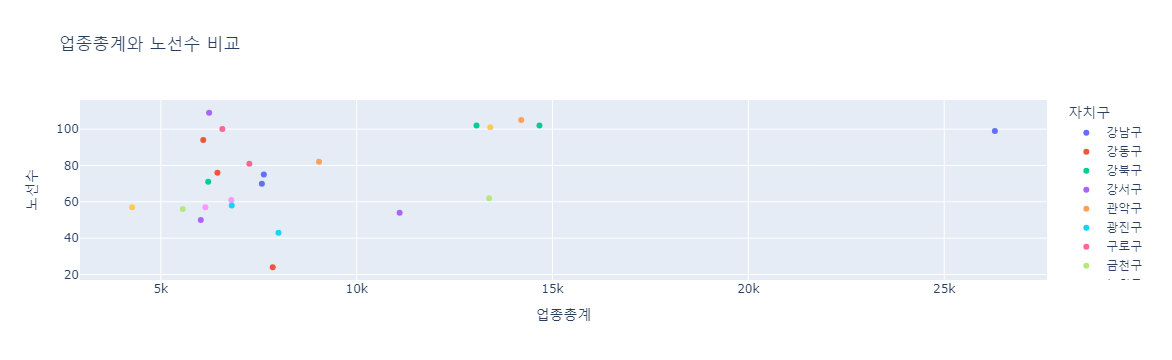

****************************************************************************************************
             노선수      업종총계    총 이동인구      정류장수
노선수     1.000000  0.426716  0.292791  0.354030
업종총계    0.426716  1.000000  0.911446  0.278309
총 이동인구  0.292791  0.911446  1.000000  0.422700
정류장수    0.354030  0.278309  0.422700  1.000000
****************************************************************************************************


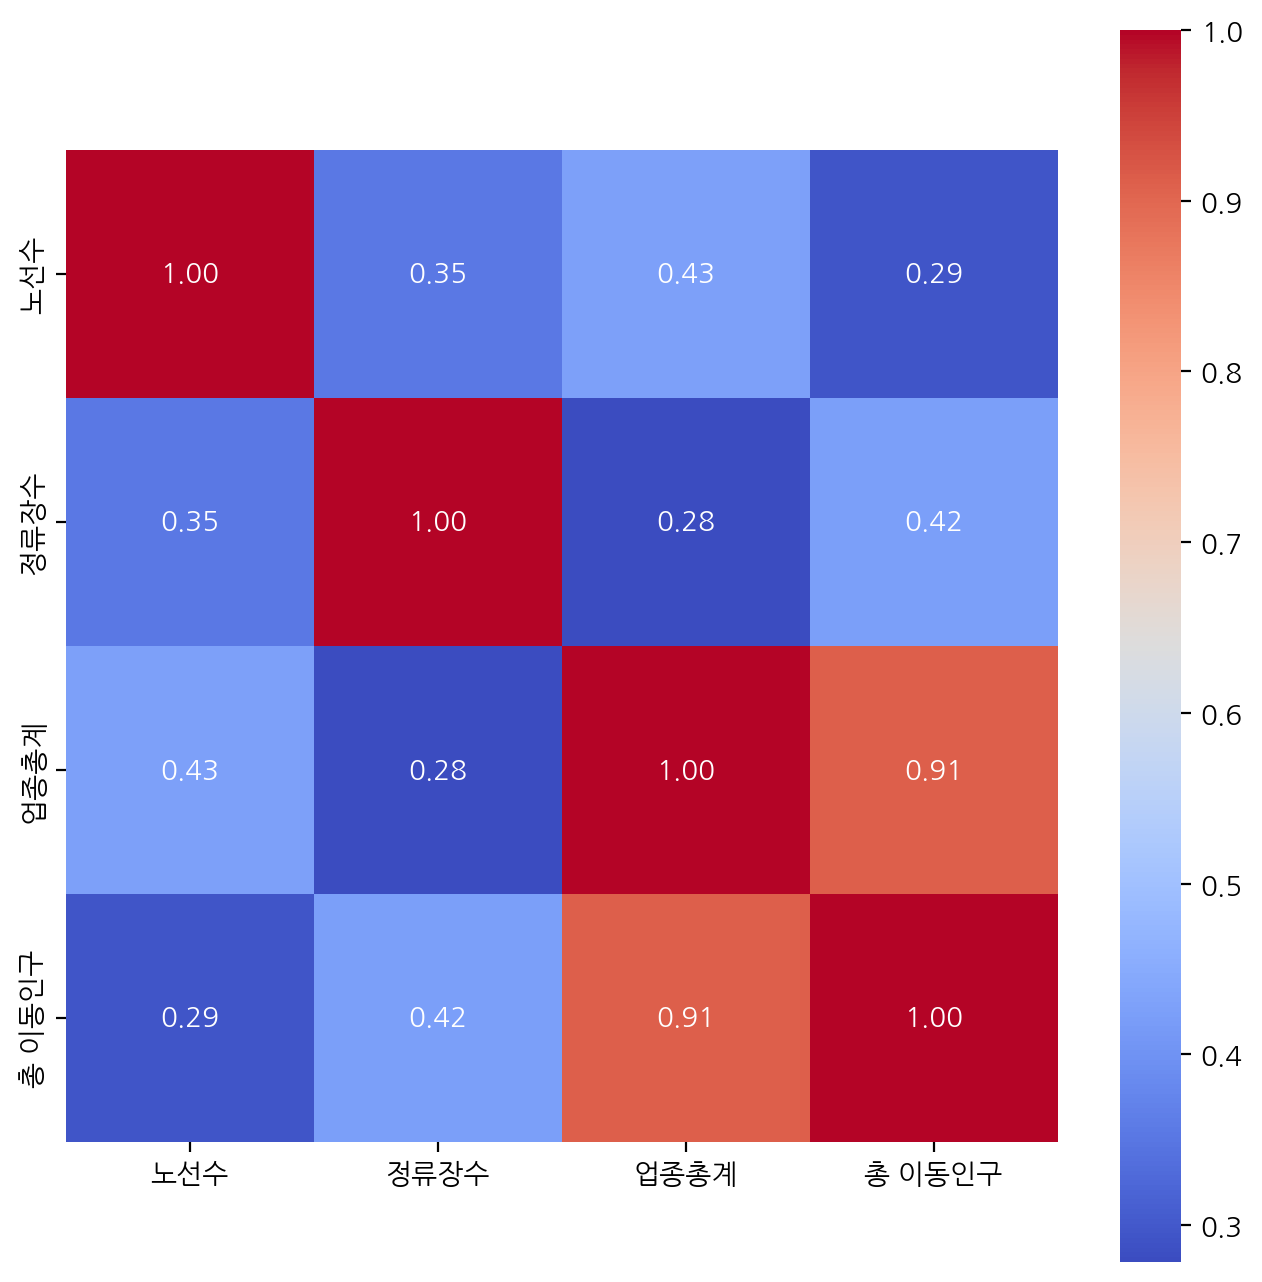

****************************************************************************************************
PearsonRResult(statistic=0.4267156571883314, pvalue=0.037571580828215545)
PearsonRResult(statistic=0.2783086181329181, pvalue=0.18789248794637287)
****************************************************************************************************


In [372]:
# 가설 4번
df['업종총계'] = df['한식 음식점'] + df['기타주점업'] + df['커피전문점']
merge4  = df[['자치구','노선수','업종총계','총 이동인구','정류장수']]
aaa = df[['노선수','업종총계','총 이동인구','정류장수']]





import scipy.stats as st
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig = px.scatter(merge4, 
                 x='업종총계', 
                 y='노선수', 
                 color='자치구', 
                 title='업종총계와 노선수 비교')
fig.show()

# 업종총계 (한식일반, 한식육류, 커피, 주점) 이 많은 지역에 이동 인구도 많으니 노선수가 부족하다면 늘릴 필요가 있다.
# 그렇다면 업종 수랑 총 이동인구의 관계를 입증
# 그래야지 업종 수가 많은데 노선수는 적으니 늘릴 필요가 있다고 주장 가능
# 업종총계 (한식일반, 한식육류, 커피, 주점) 이 많은 지역에 이동 인구도 많으니 노선수가 부족하다면 늘릴 필요가 있다.

print('*'*100)
print(merge4[['노선수','업종총계','총 이동인구','정류장수']].corr()) 
print('*'*100)

plt.figure(figsize=(8, 8))  
sns.heatmap(merge4[['노선수', '정류장수','업종총계','총 이동인구']].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True) 
plt.show()


# 업종 총계와 총 이동인구의 상관관계가 0.91로 강한 양의 관계를 보이므로 완전 관련 있음
# 즉, 업종 총계가 많을수록 이동인구는 늘어나기 떄문에 노선수를 늘릴 필요가 있다.


print('*'*100)

print(st.pearsonr(x= aaa['업종총계'], y = aaa['노선수'] ))
print(st.pearsonr(x= aaa['업종총계'], y = aaa['정류장수'] ))

print('*'*100)


# 가설 4번 결론
#### 먼저, 업종총계라는 가변수를 생성하였다. (업종총계 = 한식 일반 음식점업 + 한식 육류 음식점업 + 기타주점업 + 커피전문점)
#### 노선수와 엄종총계를 살펴보기 위해 scatter plot을 그렸다.
#### 그린 결과, 업종총계가 노선수와 중간 정도의 양의 관계가 있다고 생각했고 상관분석을 통해 관련 있음을 확인할 수 있었다.
#### 단순히, 업종총계가 높아서 노선수가 필요한 것이 아니라 히트맵을 통해 보면 업종총계와 총 이동인구가 강한 관계를 가지기 떄문에 
#### 업무총계가 많은 지역은 이동인구가 많아 대중교통을 늘릴 필요가 있다고 생각한다.
#### 업무총계가 많을수록 노선수가 많기 때문에, 현재 강동구의 경우 비슷한 업무총계를 가지는 지역보다 현저히 노선수가 작음을 확인 할 수 있다.
#### 그래서, 강동구의 노선수를 늘릴 필요성이 보인다

---

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가?
- 1번 가설에서 중구, 강동구가 정류장 수가 조절이 필요하다고 나왔고
- 2번 가설에서는 성동구가 노선수 조절이 필요하다고 나왔다.
- 4번 가설에서 강동구가 노선수 조절이 필하다.
## 결론 : 강동구의 노선수 조절이 필요하다.

### 그 이유는 무엇인가?
- 가설 검정을 통해 상관계수와 pv값을 비교하여 모든 가설에서 언급되었기 때문에 노선수의 조절이 필요한 지역은 강동구라는 결론을 도출할 수 있었다.